In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

df_x = pd.read_csv("linearX.csv",header = None)
df_y = pd.read_csv("linearY.csv", header = None)

x = df_x[0].to_numpy()
y = df_y[0].to_numpy()
x_mean = np.average(x)
x_std = np.std(x)
x = (x - x_mean)/x_std

# Hyperparameters
learning_rate = 0.025
num_iterations = 1000
convergence_threshold = 0.000000001



#Gradient descent function


def gradient_descent(x, y, learning_rate, convergence_threshold):
    w = 0.0
    b = 0.0
    error_history = []
    para1_history = []
    para2_history = []
    iterations = 0

    m = len(x)
    prev_error = float('inf')

    while True:
        w_init = w
        b_init = b
        h = w * x + b
        error = (1 / (2 * len(x))) * np.sum((h - y) ** 2)

        error_history.append(error)

        dw = (1 / m) * np.sum((h - y) * x)
        db = (1 / m) * np.sum(h - y)
        w -= learning_rate * dw
        para1_history.append(w)
        b -= learning_rate * db
        para2_history.append(b)

        if abs(prev_error - error) < convergence_threshold:
            break

        prev_error = error
        iterations += 1

    error_history = np.array(error_history)
    para1_history = np.array(para1_history)
    para2_history = np.array(para2_history)

    return w, b, error_history, iterations



def plot_data(x, y, w, b, lr):
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, label="Data Points", marker="o", color="blue")

    # Plotting the final straight line fit
    x_range = np.linspace(min(x), max(x), 100)
    y_fit = w * x_range + b
    plt.plot(x_range, y_fit, label="Straight Line Fit", color="red")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Data Points and Straight Line Fit for learning rate {lr}")
    plt.legend()
    plt.grid(True)

    # Showing the scatter plot and straight line fit
    plt.show()

In [49]:
w1, b1, error_history1, iterations1 = gradient_descent(x, y, 0.1, convergence_threshold)
w2, b2, error_history2, iterations2 = gradient_descent(x, y, 0.025, convergence_threshold)
w3, b3, error_history3, iterations3 = gradient_descent(x, y, 0.001, convergence_threshold)

In [50]:
print(f"for learning rate 0.1 |  w1 = {w1} , b1 = {b1}, iterations = {iterations1}")
print(f"for learning rate 0.025 |  w2 = {w2} , b2 = {b2}, iterations = {iterations2}")
print(f"for learning rate 0.001 |  w3 = {w3} , b3 = {b3}, iterations = {iterations3}")

for learning rate 0.1 |  w1 = 0.0013400939259324294 , b1 = 0.9965441801237728, iterations = 89
for learning rate 0.025 |  w2 = 0.0013399449842225674 , b2 = 0.9964334214737501, iterations = 338
for learning rate 0.001 |  w3 = 0.0013388540771236428 , b3 = 0.9956221819781815, iterations = 6902


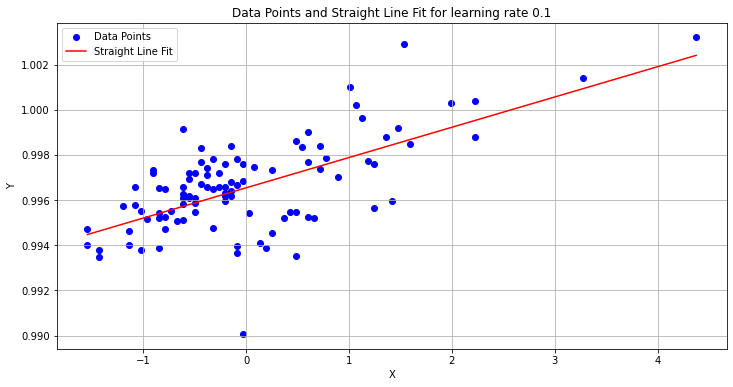

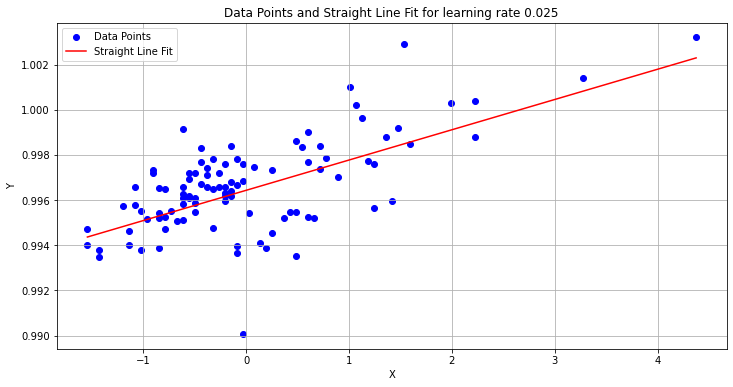

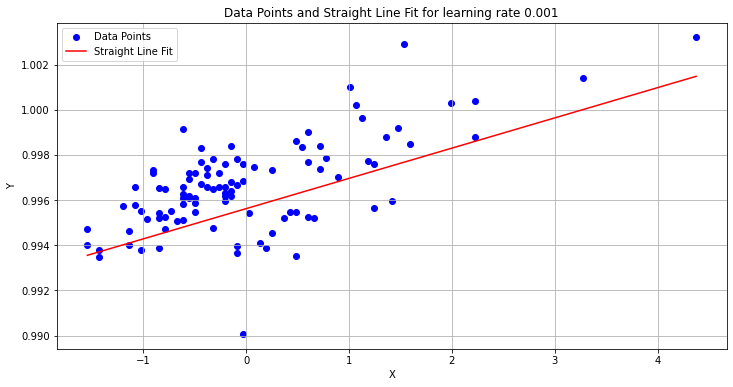

In [34]:
plot_data(x, y, w1, b1,0.1)
plot_data(x, y, w2, b2, 0.025)
plot_data(x, y, w3, b3, 0.001)

C:\Users\ANAND\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


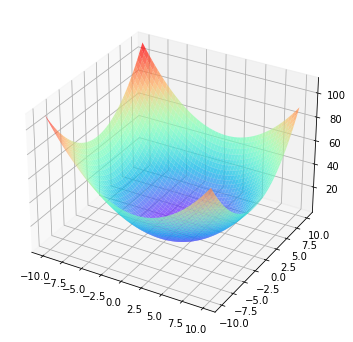

In [35]:
#Plotting the loss surface and gradient descent visualization

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D



# Creating a figure with a 3D subplot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Creating a 3D surface plot for the loss function
t0 = np.arange(-10, 10, 0.02)
t1 = np.arange(-10, 10, 0.02)
t0, t1 = np.meshgrid(t0, t1)
J = np.zeros(t0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[0]):
        y_ = t0[i, j] + t1[i, j] * x
        J[i, j] = np.sum((y_ - y) ** 2) / (2 * m)

surface = ax.plot_surface(t0, t1, J, cmap='rainbow', alpha=0.7)

# Creating an initial empty scatter plot for gradient descent updates
scatter = ax.scatter([], [], [], c='red', marker='o')

# Lists to store animation data
para1_history = []
para2_history = []
error_history = []

# Updating function for animation
def update(frame):
    global para1, para2

    # Performing gradient descent update
    gradient_0 = (para1 + para2 * x - y).sum() / m
    gradient_1 = (x * (para1 + para2 * x - y)).sum() / m

    # Updating parameters
    para1 = para1 - learning_rate * gradient_0
    para2 = para2 - learning_rate * gradient_1

    # Calculating the error and store data for animation
    errors = np.sum((para1 + para2 * x - y) ** 2) / (2 * m)
    para1_history.append(para1)
    para2_history.append(para2)
    error_history.append(errors)

    # Updating scatter plot data
    scatter._offsets3d = (para1_history, para2_history, error_history)

# Creating the animation
animation = FuncAnimation(fig, update, frames=num_iterations, interval=200, repeat=True)

plt.show()


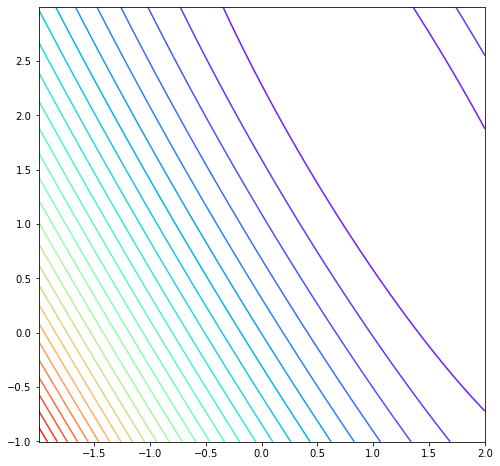

In [45]:
#plotting the contour 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


# Creating a figure with subplots for the contour plot and gradient descent updates
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(w - 2, w + 2)
ax.set_ylim(b - 2, b + 2)

# Defining the range of parameter values you want to visualize
t0 = np.linspace(w - 2, w + 2, 100)
t1 = np.linspace(b - 2, b + 2, 100)
t0, t1 = np.meshgrid(t0, t1)

# Calculating the loss values for the parameter grid
J = np.zeros(t0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = t0[i, j] + t1[i, j] * x
        J[i, j] = np.sum((y_ - y) ** 2) / (2 * m)

# Creating a contour plot for the loss function
contour = ax.contour(t0, t1, J, cmap='viridis')
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_title('Contour Plot')

# Creating an initial empty scatter plot for gradient descent updates
scatter = ax.scatter([], [], c='red', marker='o')
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')

# Lists to store animation data
para1_history = []
para2_history = []
error_history = []

# Updating function for animation
def update(frame):
    global para1, para2

    # Performing gradient descent update
    gradient_0 = (para1 + para2 * x - y).sum() / m
    gradient_1 = (x * (para1 + para2 * x - y)).sum() / m

    # Updating parameters
    para1 = para1 - learning_rate * gradient_0
    para2 = para2 - learning_rate * gradient_1

    # Calculating the error and store data for animation
    errors = np.sum((para1 + para2 * x - y) ** 2) / (2 * m)
    para1_history.append(para1)
    para2_history.append(para2)
    error_history.append(errors)

    # Updating scatter plot data
    scatter.set_offsets(np.column_stack((para1_history, para2_history)))
    scatter.set_label(f'Iteration {frame + 1}')

    # Adding legend to scatter plot
    ax.legend(loc='upper right')

# Creating the animation
animation = FuncAnimation(fig, update, frames=num_iterations, interval=200, repeat=True)

# Saveing the animation as a GIF using PillowWriter
animation.save("contour_animation(0.1).gif", writer=PillowWriter(fps=5))

plt.show()
